In [2]:
from ultralytics import YOLO
import os
import random
import cv2
import numpy as np
import shutil
import supervision as sv
import cv2
import matplotlib.pyplot as plt


/home/mbergst/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
keypoints = {1: (44, 30), 2: (457, 30), 3: (44, 563), 4: (457, 563), 5: (44, 138), 6: (174, 138), 7: (174, 230), 8: (174, 346), 9: (174, 453), 10: (44, 453), 11: (44, 230), 12: (86, 230), 13: (86, 368), 14: (44, 368), 15: (130, 295), 16: (457, 230), 17: (457, 295), 18: (457, 368), 19: (201, 295), 20: (387, 295), 21: (530, 295), 22: (870, 30), 23: (870, 563), 24: (870, 138), 25: (740, 138), 26: (740, 230), 27: (740, 346), 28: (740, 453), 29: (870, 453), 30: (870, 230), 31: (827, 230), 32: (827, 368), 33: (870, 368), 34: (785, 295), 35: (712, 295)}

In [4]:
# Choose dataset 1 or 2:
dataset = 1  # 1 or 2

if dataset == 1:
    data_folder = "1_train-val_1min_aalesund_from_start"
    yaml_file = "yaml_files/keypoint_1.yaml"
    labels = "labels_1"

else:
    data_folder = "2_train-val_1min_after_goal"
    yaml_file = "yaml_files/keypoint_2.yaml"
    labels = "labels_2"

In [2]:
image_src_folder = f'/datasets/tdt4265/other/rbk/{data_folder}/img1'
label_src_folder = f'/work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/{labels}'
image_dest_folder = f'/work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/{data_folder}/images/'
label_dest_folder = f'/work/mbergst/TDT4265_Project/data_yolov8/keypoint_detection/{data_folder}/labels/'

from scripts.keypoint_dataset import distribute_files

distribute_files(image_src_folder, label_src_folder, image_dest_folder, label_dest_folder)

In [4]:
# Last inn sist trente modell
# Gjør det ikke bedre virker det som

def find_latest_model_with_best(base_path, type='keypoints'):
    detect_path = os.path.join(base_path, 'runs', type)
    training_sessions = [os.path.join(detect_path, d) for d in os.listdir(detect_path) if os.path.isdir(os.path.join(detect_path, d))]
    
    # Liste for å holde stiene til alle 'best.pt'-filer
    best_model_paths = []

    for session in training_sessions:
        best_model_path = os.path.join(session, 'weights', 'best.pt')
        if os.path.exists(best_model_path):
            best_model_paths.append((best_model_path, os.path.getmtime(best_model_path)))

    if not best_model_paths:
        print("Ingen 'best.pt' fil funnet i noen av treningsøktene.")
        return None
    
    # Sorter basert på modifiseringstid og returner den nyeste
    best_model_paths.sort(key=lambda x: x[1], reverse=True)
    return best_model_paths[0][0]


base_path = '/work/mbergst/TDT4265_Project' 


#model = YOLO(find_latest_model_with_best(base_path, 'keypoints'))
#model = YOLO('yolov8n.pt')


In [5]:
# Gjør det veldig bra på dataset 1
model = YOLO('/work/mbergst/TDT4265_Project/runs/keypoints/train54/weights/best.pt')

In [ ]:
results = model.train(data=yaml_file, epochs=50, batch=18, imgsz=(1600, 900), project='/work/mbergst/TDT4265_Project/runs/keypoints')

In [ ]:
# Evaluér modellens prestasjon på valideringssettet
val_results = model.val()

In [6]:
# Tracking

all_frames = f'/datasets/tdt4265/other/rbk/{data_folder}/img1'
frame_paths = sorted([os.path.join(all_frames, f) for f in os.listdir(all_frames) if f.endswith('.jpg')])


In [6]:
# Iterere over hver frame og bruk track metoden
for frame_path in frame_paths:
    # model.track kan være en generator, så vi bruker en løkke for å hente resultatene
    for result in model.track(frame_path, persist=True, stream=True, line_width=1):
        annotated_frame = result.plot(font_size=1, line_width=1)
        cv2.imshow('frame', annotated_frame)
        # Vent på et tastetrykk i 1 millisekund og sjekk om det er 'ESC'
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # 27 er ASCII-verdien for 'ESC'
            break

    if key == 27:  # Kontroller igjen om 'ESC' ble trykket for å bryte ut av den ytre løkken
        break

cv2.destroyAllWindows()  # Lukker alle OpenCV-vinduene


image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000001.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 43.1ms
Speed: 5.5ms preprocess, 43.1ms inference, 155.9ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000002.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.7ms
Speed: 3.7ms preprocess, 2.7ms inference, 0.6ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000003.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.3ms
Speed: 3.4ms preprocess, 2.3ms inference, 0.5ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000004.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.3ms
Speed: 3.4ms preprocess, 2.3ms inference, 0.5ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/r

In [42]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

def plot_keypoints_on_image(ax, image_path, keypoints, keypoint_labels, point_radius=5, label_offset=(10, -10)):

    image = Image.open(image_path)
    ax.imshow(image)

    for (x, y), label in zip(keypoints, keypoint_labels):
        ax.scatter(x, y, color='blue', s=point_radius**2)
        ax.text(x + label_offset[0], y + label_offset[1], label, color='blue', fontsize=9)

    ax.axis('off')

def plot_pred_on_image(ax, image_path, keypoints, keypoint_labels, players, ball, point_radius=5, label_offset=(10, -10)):


    image = Image.open(image_path)
    ax.imshow(image)

    for (x, y), label in zip(keypoints, keypoint_labels):
        ax.scatter(x, y, color='blue', s=point_radius**2)
        ax.text(x + label_offset[0], y + label_offset[1], label, color='blue', fontsize=9)

    for player in players:
        ax.scatter(player[0], player[1], color='red', s=point_radius**2)

    ax.scatter(ball[0], ball[1], color='orange', s=point_radius**2)
    
    ax.axis('off')



Known coordinates of each keypoint on pitch:


1    2    3    4    5    6    7    8    9    10  ...   26   27   28   29  \
x  44  457   44  457   44  174  174  174  174   44  ...  740  740  740  870   
y  30   30  563  563  138  138  230  346  453  453  ...  230  346  453  453   

    30   31   32   33   34   35  
x  870  827  827  870  785  712  
y  230  230  368  368  295  295  

[2 rows x 35 columns]


image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000001.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.8ms
Speed: 21.8ms preprocess, 2.8ms inference, 0.5ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000001.jpg: 1088x1920 22 players, 3.0ms
Speed: 2.3ms preprocess, 3.0ms inference, 0.5ms postprocess per image at shape (1, 3, 1088, 1920)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000001.jpg: 1088x1920 1 ball, 2.5ms
Speed: 2.2ms preprocess, 2.5ms inference, 0.5ms postprocess per image at shape (1, 3, 1088, 1920)


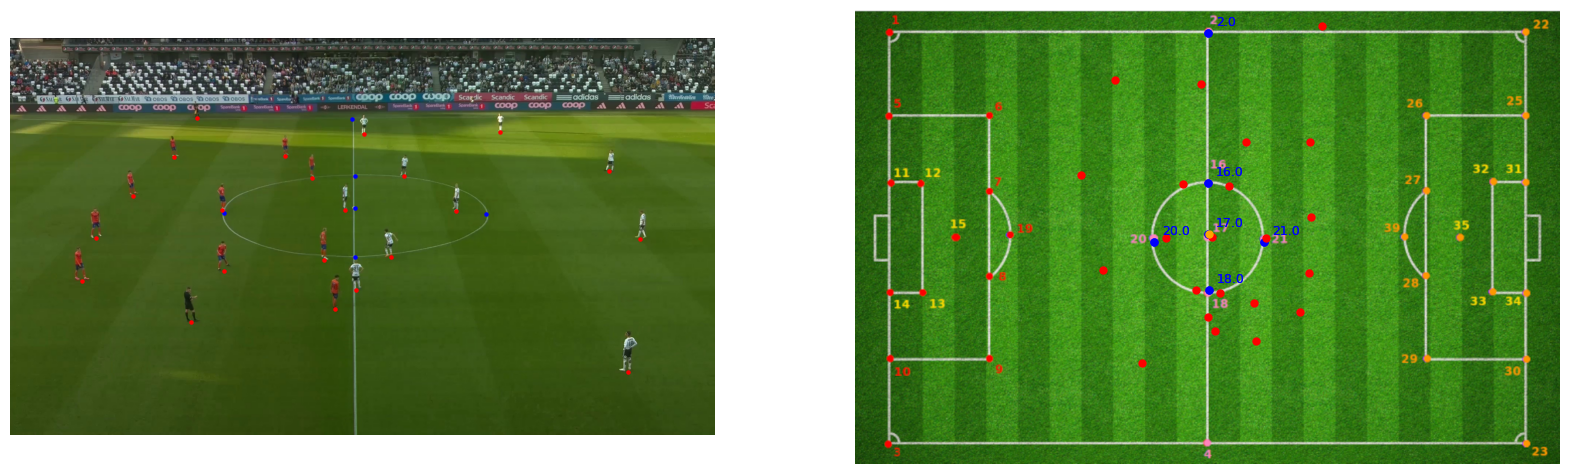


image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000002.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.6ms
Speed: 3.5ms preprocess, 2.6ms inference, 0.8ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000002.jpg: 1088x1920 22 players, 2.8ms
Speed: 2.3ms preprocess, 2.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1088, 1920)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000002.jpg: 1088x1920 1 ball, 2.5ms
Speed: 2.8ms preprocess, 2.5ms inference, 0.5ms postprocess per image at shape (1, 3, 1088, 1920)


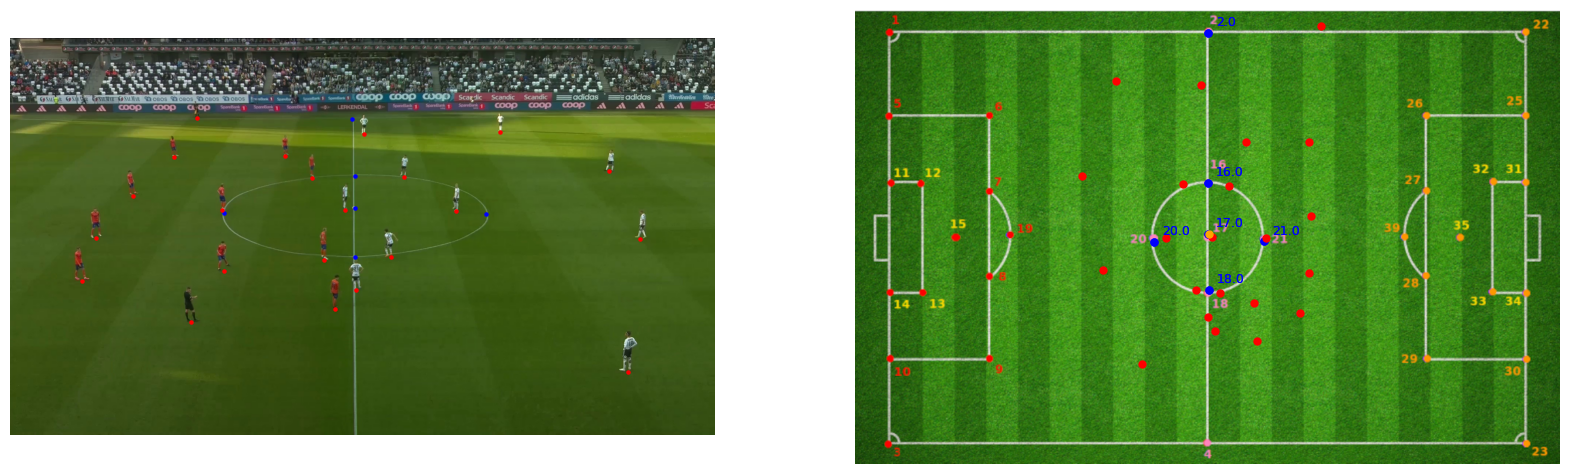


image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000003.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.6ms
Speed: 3.6ms preprocess, 2.6ms inference, 0.5ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000003.jpg: 1088x1920 22 players, 2.8ms
Speed: 2.4ms preprocess, 2.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1088, 1920)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000003.jpg: 1088x1920 1 ball, 2.7ms
Speed: 2.3ms preprocess, 2.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1088, 1920)


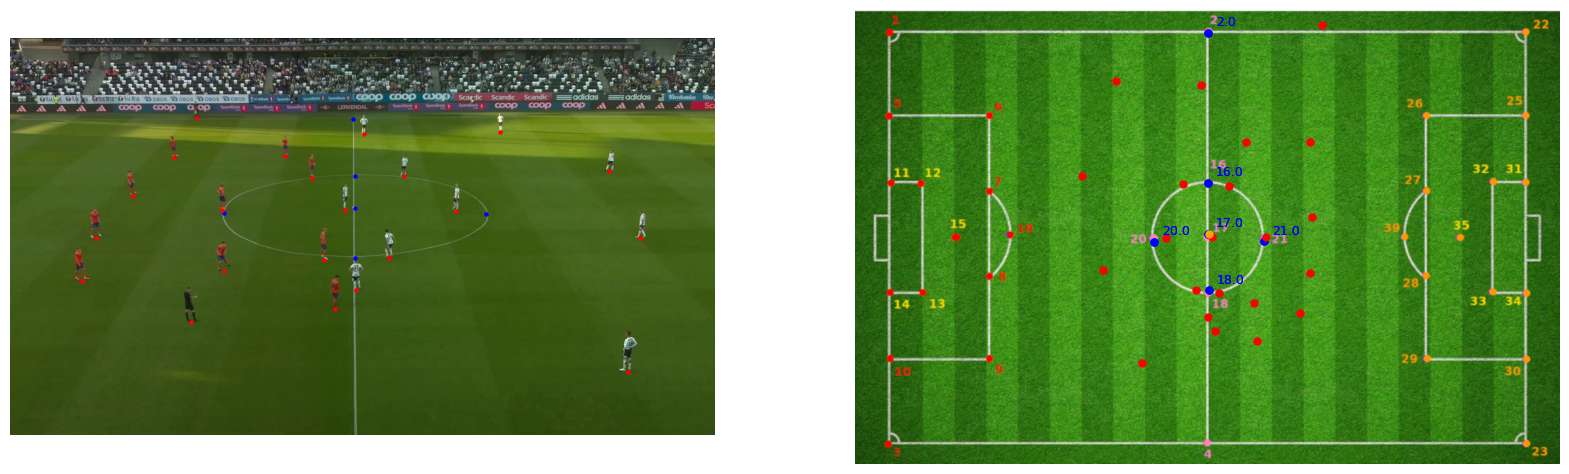


image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000004.jpg: 928x1600 1 1, 1 18, 1 19, 1 20, 1 24, 1 25, 2.9ms
Speed: 3.6ms preprocess, 2.9ms inference, 0.6ms postprocess per image at shape (1, 3, 928, 1600)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000004.jpg: 1088x1920 22 players, 2.6ms
Speed: 2.4ms preprocess, 2.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1088, 1920)

image 1/1 /datasets/tdt4265/other/rbk/1_train-val_1min_aalesund_from_start/img1/000004.jpg: 1088x1920 1 ball, 2.6ms
Speed: 2.3ms preprocess, 2.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1088, 1920)


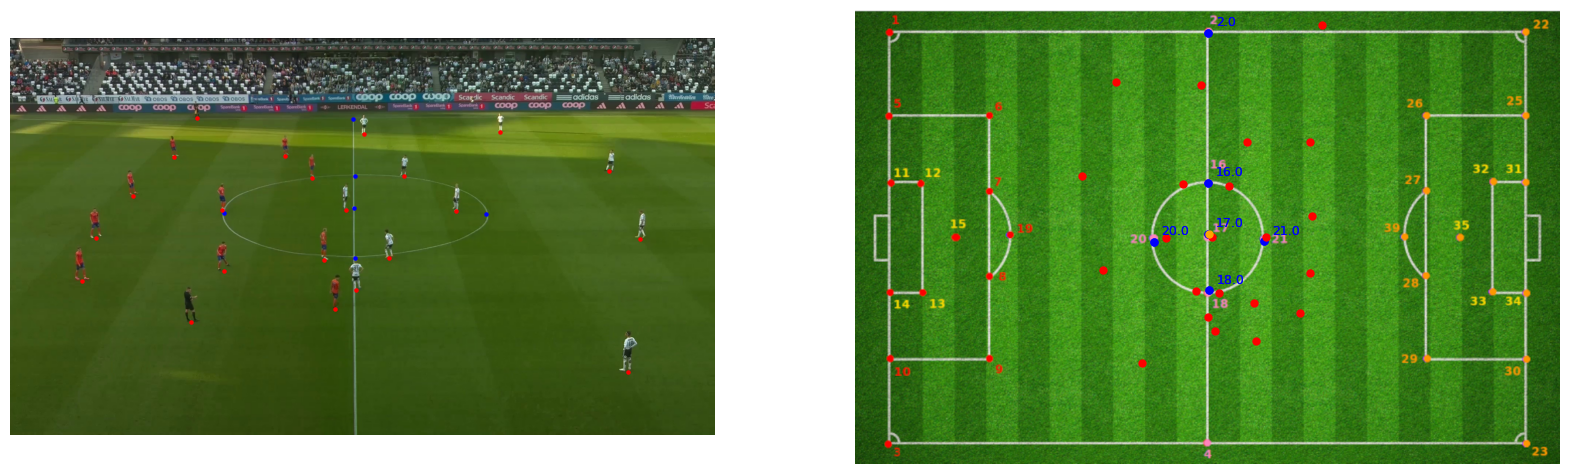

In [43]:
# Keypoint mapping
import pandas as pd

model_players = YOLO('/work/mbergst/TDT4265_Project/runs/detect/player/train4/weights/best.pt')
model_ball = YOLO('/work/mbergst/TDT4265_Project/runs/detect/ball/train3/weights/best.pt')

print("Known coordinates of each keypoint on pitch:")
display(pd.DataFrame(keypoints, index = ['x', 'y']))

# Initialize frame numbers
frame_number = 0

keypoints_displ_mean_tol = 10

keypoints_model_confidence_treshold = 0.5

mini_map_path = 'pitch.png'

# Iterate over frames



for frame in frame_paths[:4]:

    for result_keyp, result_player, result_ball in zip(model.track(frame), model_players.track(frame), model_ball.track(frame)):
        
        # bounding boxes and labels for keypoints, players and ball
        bboxes_keyp = result_keyp.boxes.xyxy.cpu().numpy()
        bboxes_keyp_c = result_keyp.boxes.xywh.cpu().numpy()
        labels_keyp = list(result_keyp.boxes.cls.cpu().numpy())


        bboxes_player = result_player.boxes.xyxy.cpu().numpy()
        bboxes_player_c = result_player.boxes.xywh.cpu().numpy()
        labels_player = list(result_player.boxes.cls.cpu().numpy())
        

        bboxes_ball = result_ball.boxes.xyxy.cpu().numpy()
        bboxes_ball_c = result_ball.boxes.xywh.cpu().numpy()
        labels_ball = list(result_ball.boxes.cls.cpu().numpy())

        # Detected labels source points
        detected_labels_src = np.array([list(np.round(bboxes_keyp_c[i][:2]).astype(int)) for i in range(bboxes_keyp_c.shape[0])])
        image = Image.open(frame)


        # Detected labels destination points
        detected_labels_dst = np.array([keypoints[i +1] for i in labels_keyp])

        bboxes_player_c_0 = bboxes_player_c[[i==0 for i in labels_player]]

        # Get coordinates of detected players as x_center, y_center + h/2
        detected_player_src = bboxes_player_c[:, :2] + np.array([[0]*bboxes_player_c_0.shape[0], bboxes_player_c_0[:, 3] / 2]).T
        # plot player points on frame



        # Get coordinates of detected ball as x_center, y_center
        detected_ball_src = bboxes_ball_c[0, :2] if len(bboxes_ball_c) > 0 else []

        #print("detected labels src", detected_labels_src)
        #print("detected labels dst", detected_labels_dst)
        # Calculate homography transformation matrix if more than 3 keypoints are detected
        if len(detected_labels_src) > 3:
            H, _ = cv2.findHomography(detected_labels_src, detected_labels_dst)
            #print("H", H)

            # Transform keypoint coordinates from fram to pitch.png using calculated homography matrix
            # pred_dst_pts = cv2.perspectiveTransform(np.array([bboxes_keyp_c[:, :2]]), H).squeeze()

            pred_dest_keypoints = []
            for pt in detected_labels_src:
                pt = np.append(np.array(pt), np.array([1]), axis=0) 
                dest_point = np.matmul(H, np.transpose(pt))
                dest_point = dest_point / dest_point[2]
                pred_dest_keypoints.append(list(np.transpose(dest_point)[:2]))
            pred_dest_keypoints = np.array(pred_dest_keypoints)

            #print("pred_dest_keypoints", pred_dest_keypoints)

            pred_player_points = []
            for pt in detected_player_src:
                pt = np.append(np.array(pt), np.array([1]), axis=0) 
                dest_point = np.matmul(H, np.transpose(pt))
                dest_point = dest_point / dest_point[2]
                pred_player_points.append(list(np.transpose(dest_point)[:2]))
            pred_player_points = np.array(pred_player_points)

            #print("pred_player_points", pred_player_points)

            if detected_ball_src is not None:
                pt = np.append(np.array(detected_ball_src), np.array([1]), axis=0) 
                dest_point = np.matmul(H, np.transpose(pt))
                dest_point = dest_point / dest_point[2]
                detected_ball_dst = np.transpose(dest_point)
        
            #print("detected_ball_dst", detected_ball_dst)

            # Add +1 for every label to match the pitch picture when plotting
            labels_keyp = [label + 1 for label in labels_keyp]

            plt.ion()
            fig, axes = plt.subplots(1, 2, figsize=(20, 16))

            axes[0].imshow(image)
            for keypoint in detected_labels_src:
                axes[0].scatter(keypoint[0], keypoint[1], color='blue', s=5)
            for player in detected_player_src:
                axes[0].scatter(player[0], player[1], color='red', s=5)
            axes[0].axis('off')

            
            # Draw keypoints on pitch
            plot_keypoints_on_image(axes[1], mini_map_path, pred_dest_keypoints, labels_keyp)

            # Draw keypoints, players and ball on pitch
            plot_pred_on_image(axes[1], mini_map_path, pred_dest_keypoints, labels_keyp, pred_player_points, detected_ball_dst)
        
            plt.show()



            
        else:
            print("Not enough keypoints detected for homography calculation in frame", frame_number)
            continue

plt.ioff()  # Slår av interaktiv modus

        



In [65]:
import numpy as np

# Anta at H er definert som følger:
H = np.array([
    [-0.41558,     0.01178,      385.65],
    [-0.31744,   0.0081165,      294.76],
    [-0.001075, 2.4567e-05,           1]
])

# Testpunkter '
src_pt = np.array([
    [940, 374],
    [938, 597],
    [939, 460],
    [1299, 478],
    [584, 475],
    [934, 217]
])

# Legg til en rad med enere for å gjøre punktene homogene
src_pt = np.concatenate([src_pt, np.ones((src_pt.shape[0], 1))], axis=1)

# Utfør transformasjonen
dst_pt = np.matmul(H, src_pt.T)
dst_pt = dst_pt / dst_pt[2]

print("Transformerte punkter:")
print(dst_pt)




Transformerte punkter:
[[     449.32      454.15      447.37      386.18      386.97      42.575]
 [     455.83      292.38      222.53      295.61      294.97       25.23]
 [          1           1           1           1           1           1]]
